In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [24]:
#Read the Dataset
df = pd.read_csv('period data.csv')
df.head()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,no,5 6,76.0,0,26.3,30,4.0
1,4,18,25,17,10,6,yes,5 6,76.0,0,26.3,30,5.0
2,2,19,30,17,13,4,no,5 3,56.0,0,21.9,30,2.0
3,3,19,28,16,14,6,no,5 1,61.0,0,25.4,30,3.0
4,2,19,35,18,15,5,no,5'3,55.0,0,21.5,35,5.0


In [4]:
#Apply Pandas Profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = 'menstrual_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
import os
from pathlib import Path

IMAGES_PATH = Path() / "images" / "Data Preprocessing"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [26]:
df.describe()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0,162.000000,162.000000,162.000000
mean,2.518519,19.333333,29.283951,15.135802,12.753086,5.061728,56.696296,0.0,21.738889,29.320988,3.372840
std,0.706863,1.453204,4.191783,2.352496,3.270538,1.025703,9.471440,0.0,2.975396,5.319196,1.183112
min,1.000000,14.000000,22.000000,7.000000,7.000000,1.000000,40.000000,0.0,16.200000,13.000000,1.000000
25%,2.000000,19.000000,27.000000,14.000000,10.000000,5.000000,51.000000,0.0,20.400000,27.000000,3.000000
50%,2.000000,19.000000,28.000000,15.000000,13.000000,5.000000,55.000000,0.0,21.600000,30.000000,3.000000
75%,3.000000,20.000000,30.000000,16.000000,14.000000,6.000000,60.000000,0.0,22.500000,30.000000,4.000000
max,5.000000,25.000000,40.000000,22.000000,30.000000,8.000000,85.000000,0.0,32.900000,46.000000,5.000000


In [27]:
df.isnull().sum()

number_of_peak                0
Age                           0
Length_of_cycle               0
Estimated_day_of_ovulution    0
Length_of_Leutal_Phase        0
Length_of_menses              0
Unusual_Bleeding              0
Height                        0
Weight                        0
Income                        0
BMI                           0
Mean_of_length_of_cycle       0
Menses_score                  0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_peak              162 non-null    int64  
 1   Age                         162 non-null    int64  
 2   Length_of_cycle             162 non-null    int64  
 3   Estimated_day_of_ovulution  162 non-null    int64  
 4   Length_of_Leutal_Phase      162 non-null    int64  
 5   Length_of_menses            162 non-null    int64  
 6   Unusual_Bleeding            162 non-null    object 
 7   Height                      162 non-null    object 
 8   Weight                      162 non-null    float64
 9   Income                      162 non-null    int64  
 10  BMI                         162 non-null    float64
 11  Mean_of_length_of_cycle     162 non-null    int64  
 12  Menses_score                162 non-null    float64
dtypes: float64(3), int64(8), object(2)


In [29]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'number_of_peak':
[3 4 2 5 1]
Unique values in column 'Age':
[18 19 20 22 23 14 17 25]
Unique values in column 'Length_of_cycle':
[27 25 30 28 35 40 37 34 26 23 29 24 22 36 38 32]
Unique values in column 'Estimated_day_of_ovulution':
[14 17 16 18 15 10 11 13  7 20 12 22]
Unique values in column 'Length_of_Leutal_Phase':
[ 9 10 13 14 15 12 16 11  7  8 19 30]
Unique values in column 'Length_of_menses':
[5 6 4 3 1 7 8]
Unique values in column 'Unusual_Bleeding':
['no' 'yes' 'No' 'NO']
Unique values in column 'Height':
['5 6' '5 3' '5 1' "5'3" "5'4" "5'1" "5'0" '5\'4"' "5'9" "5'5''" "5'6"
 "5'" "5'2.5" "5'2" "4'8" "4' 11" "5'7" '5 4' "5' 4" "5'5" '56' "5'8"
 '5\'2"' '5.3"' '5\'5"' '5\'1"' '5\'3"']
Unique values in column 'Weight':
[76.  56.  61.  55.  50.  60.  58.  51.  54.  43.  72.  75.  48.  45.5
 53.  47.  82.  57.  40.  64.  55.2 65.  62.  85.  84.  52.  70. ]
Unique values in column 'Income':
[0]
Unique values in column 'BMI':
[26.3  21.9  25.4  21.5  19.   2

In [30]:
df["Unusual_Bleeding"]=df["Unusual_Bleeding"].map({"NO":0,"No":0,"no":0,"yes":1})
df["Menses_score"]=df["Menses_score"].astype(str).map({"1.0":0, "2.0":1, "3.0":2, "4.0":3, "4.2":4, "4.5":5, "5.0":6})

In [31]:
df.head()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,0,5 6,76.0,0,26.3,30,3
1,4,18,25,17,10,6,1,5 6,76.0,0,26.3,30,6
2,2,19,30,17,13,4,0,5 3,56.0,0,21.9,30,1
3,3,19,28,16,14,6,0,5 1,61.0,0,25.4,30,2
4,2,19,35,18,15,5,0,5'3,55.0,0,21.5,35,6


In [32]:
df.drop("Income", axis=1, inplace=True)
df.drop("Height", axis=1, inplace=True)

In [33]:
df.head()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Weight,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,0,76.0,26.3,30,3
1,4,18,25,17,10,6,1,76.0,26.3,30,6
2,2,19,30,17,13,4,0,56.0,21.9,30,1
3,3,19,28,16,14,6,0,61.0,25.4,30,2
4,2,19,35,18,15,5,0,55.0,21.5,35,6


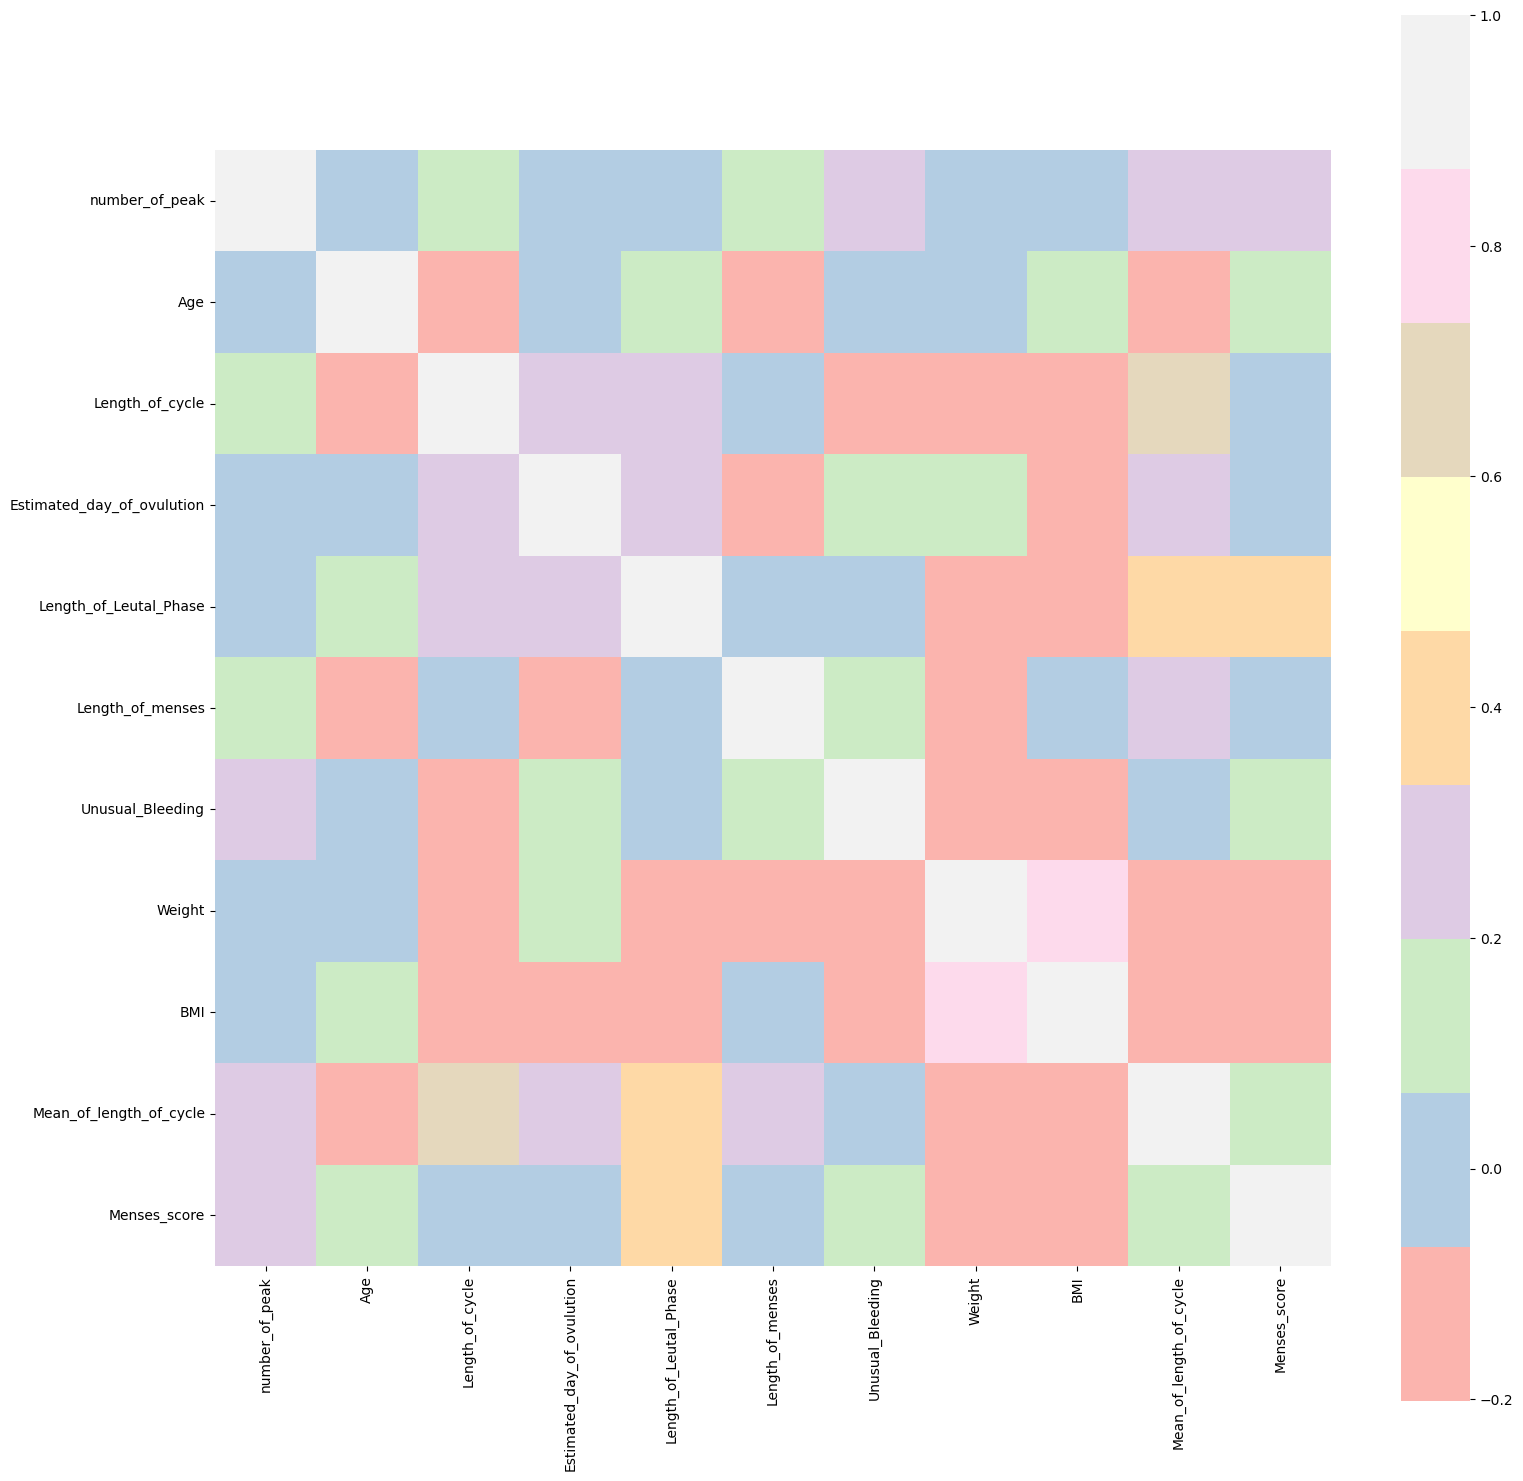

In [34]:
#Examaning a correlation matrix of all the features 

corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [35]:
#How all the features correlate with length of cycle

corrmat["Length_of_cycle"].sort_values(ascending=False)

Length_of_cycle               1.000000
Mean_of_length_of_cycle       0.647733
Estimated_day_of_ovulution    0.312257
Length_of_Leutal_Phase        0.279700
number_of_peak                0.163817
Menses_score                 -0.013933
Length_of_menses             -0.032994
Weight                       -0.071218
Age                          -0.072735
Unusual_Bleeding             -0.121798
BMI                          -0.148648
Name: Length_of_cycle, dtype: float64

In [36]:
#How all the features correlate with the menses score

corrmat["Menses_score"].sort_values(ascending=False)

Menses_score                  1.000000
Length_of_Leutal_Phase        0.354059
number_of_peak                0.224772
Unusual_Bleeding              0.195167
Mean_of_length_of_cycle       0.194479
Age                           0.073570
Length_of_menses              0.064663
Estimated_day_of_ovulution    0.028509
Length_of_cycle              -0.013933
BMI                          -0.082456
Weight                       -0.093799
Name: Menses_score, dtype: float64

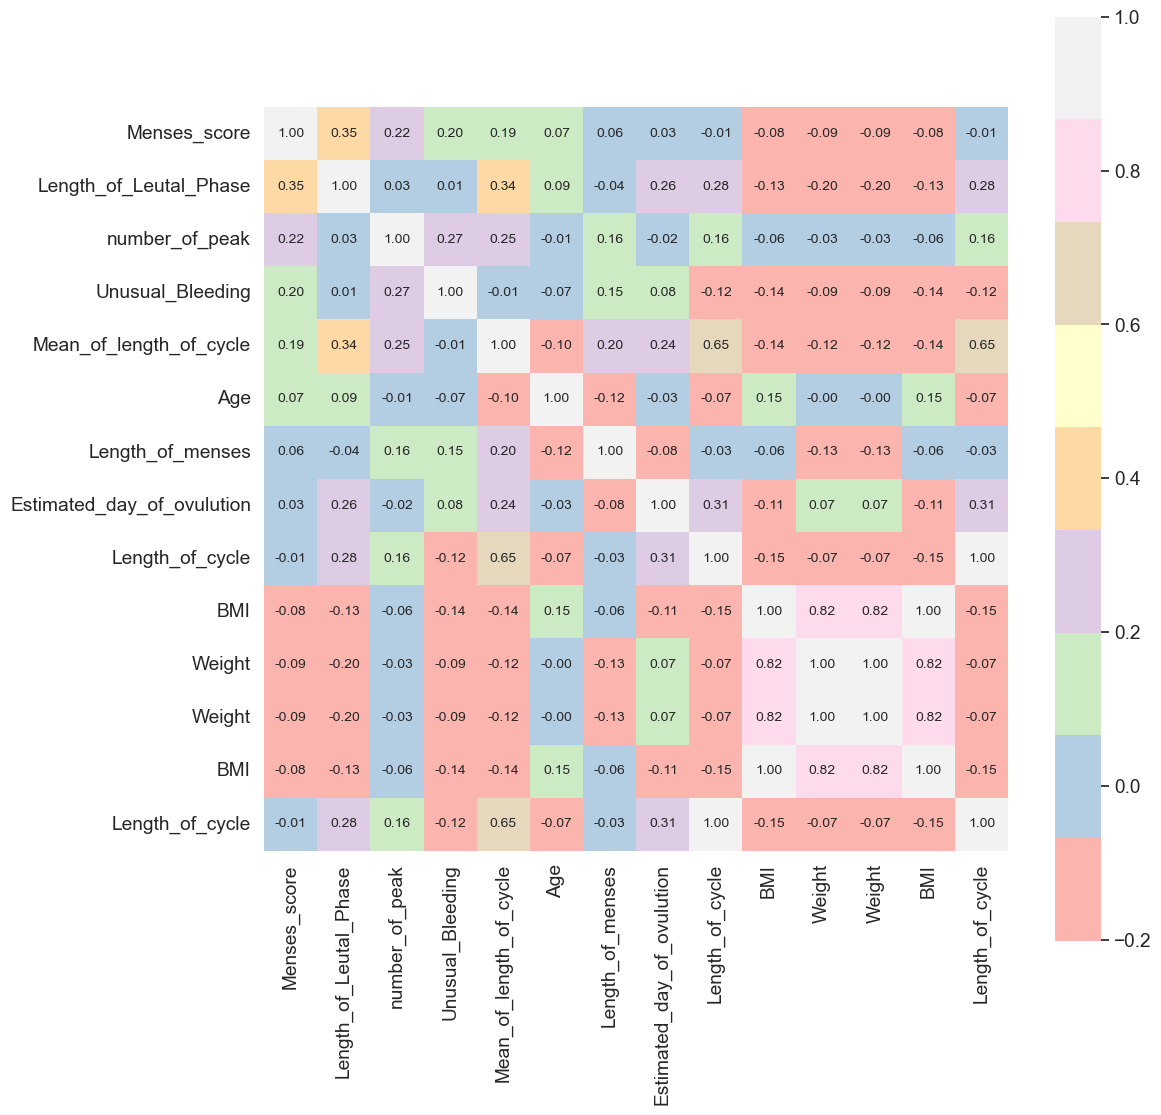

In [37]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "Menses_score")["Menses_score"].index 
cols_n = corrmat.nsmallest(l, "Menses_score")["Menses_score"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [38]:
features = ['Mean_of_length_of_cycle', 'Estimated_day_of_ovulution', 'Length_of_Leutal_Phase', 'number_of_peak']
X = df[features]
y = df['Length_of_cycle']


In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) 

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [42]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 1.6989046220219686
Mean Squared Error (MSE): 5.246214262519289
R-squared (R2): 0.7252266383598269


In [51]:
# Example of new data for which we want to predict the Length of Cycle
new_data = {
    'Mean_of_length_of_cycle': 28,
    'Estimated_day_of_ovulution': 15,
    'Length_of_Leutal_Phase': 12,
    'number_of_peak': 4
}

# Convert the new data into a DataFrame with the correct feature order
new_data_df = pd.DataFrame([new_data])

# Reindex the new_data_df to ensure it has the same column order as X_train
new_data_df = new_data_df.reindex(columns=X_train.columns)

# Use the trained model to predict the length of cycle
predicted_length_of_cycle = model.predict(new_data_df)

# Output the prediction
print(f"Predicted Length of Cycle: {predicted_length_of_cycle[0]}")

Predicted Length of Cycle: 27.43
